In [1]:
#install data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#Read in csv files
products_df= pd.read_csv('products.csv')   
stores_df= pd.read_csv('stores.csv')
transactions_df= pd.read_csv('transactions.csv') 


### StoreID in transaction table is an object and needs to be converted into an integer
**Using Data Wrangler**

In [ ]:
#Read in updated transaction csv file
updated_transaction_df= pd.read_csv('updated_transaction.csv')


### Merging products and stores with transaction table for consolidation

In [19]:
#Impute Store city and state from stores table into transactions_df using store_id
updated_transaction_df = updated_transaction_df.merge(stores_df, on='StoreID', how='left')


In [20]:
#Impute the product information from products table into transactions_df using product_id
updated_transaction_df = updated_transaction_df.merge(products_df, on='ProductID', how='left')

In [22]:
#Visualize the updated transaction data
updated_transaction_df

,CustomerID,StoreID,PurchaseDate,ProductID,Price_x,StoreCity,StoreState,ProductName,ProductType,ProductCategory,Price_y
0,J47338598,101,2023-06-06,1045,$25.99,Abilene,TX,Pink Beanie,Beanie,Headwear,$25.99
1,J47338598,101,2023-06-06,1068,"$1,000.99",Abilene,TX,Bookshelf,Shelving and Storage,Furniture,"$1,000.99"
2,J47641989,102,2023-06-12,1027,$33.99,Akron,OH,Green Long Sleeve,Long Sleeve,Clothing,$33.99
3,J48280578,101,2023-06-03,1016,$48.99,Abilene,TX,Neon Pants,Pants,Clothing,$48.99
4,J48327939,101,2023-06-06,1065,"$2,000.99",Abilene,TX,Dining table,Table,Furniture,"$2,000.99"
...,...,...,...,...,...,...,...,...,...,...,...
127199,JZ3496,145,2023-06-08,1063,$38.99,Carmel,IN,Purple Sneakers,Sneakers,Footwear,$38.99
127200,JZ3496,145,2023-06-08,1043,$25.99,Carmel,IN,Green Beanie,Beanie,Headwear,$25.99
127201,JZ3496,145,2023-06-08,1025,$33.99,Carmel,IN,Blue Long Sleeve,Long Sleeve,Clothing,$33.99
127202,JZ3496,145,2023-06-08,1080,"$3,000.99",Carmel,IN,Writing desk,Desk,Furniture,"$3,000.99"


### Make final edits to the Master Table
* Purchase Date to Datetime
* Drop the duplicate price dimension from merging
* Purchase price to Float datatype

In [73]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(updated_transaction_df):
    # Change column type to datetime64[ns] for column: 'PurchaseDate'
    updated_transaction_df = updated_transaction_df.astype({'PurchaseDate': 'datetime64[ns]'})
    # Drop column: 'Price_y'
    updated_transaction_df = updated_transaction_df.drop(columns=['Price_y'])
    # Remove dollar signs and commas, convert to float
    updated_transaction_df['Price_x'] = updated_transaction_df['Price_x'].replace({'\$': '', ',': ''}, regex=True).astype('float32') # type: ignore
    return updated_transaction_df

updated_transaction_df_clean = clean_data(updated_transaction_df.copy())
updated_transaction_df_clean.head()

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/var/folders/sk/5_cvdl6x7d56myxmf4txbrg80000gn/T/ipykernel_72233/255384912.py:10: SyntaxWarning: invalid escape sequence '\$'
  updated_transaction_df['Price_x'] = updated_transaction_df['Price_x'].replace({'\$': '', ',': ''}, regex=True).astype('float32')


,CustomerID,StoreID,PurchaseDate,ProductID,Price_x,StoreCity,StoreState,ProductName,ProductType,ProductCategory
0,J47338598,101,2023-06-06,1045,25.990000,Abilene,TX,Pink Beanie,Beanie,Headwear
1,J47338598,101,2023-06-06,1068,1000.989990,Abilene,TX,Bookshelf,Shelving and Storage,Furniture
2,J47641989,102,2023-06-12,1027,33.990002,Akron,OH,Green Long Sleeve,Long Sleeve,Clothing
3,J48280578,101,2023-06-03,1016,48.990002,Abilene,TX,Neon Pants,Pants,Clothing
4,J48327939,101,2023-06-06,1065,2000.989990,Abilene,TX,Dining table,Table,Furniture


In [36]:
#Save the updated transaction data to a new csv file
updated_transaction_df_clean.to_csv('updated_transaction_clean.csv', index=False)

### Use Updated Transaction as Master Table

In [37]:
# Read in cleaned transaction data
df_clean = pd.read_csv('updated_transaction_clean.csv')


In [74]:
#Visualize the cleaned transaction data
print(df_clean.head())
print(df_clean.info())

        CustomerID  StoreID PurchaseDate  ProductID  Price_x  \
24894   J107959423      102   2023-06-01       1002    34.99   
112882  J687267742      164   2023-06-01       1071  1000.99   
112881  J687267742      164   2023-06-01       1028    33.99   
112880  J687267742      164   2023-06-01       1016    48.99   
79633   J298257888      113   2023-06-01       1020    25.99   

               StoreCity StoreState         ProductName  ProductType  \
24894              Akron         OH          Red Shorts       Shorts   
112882  Colorado Springs         CO          Nightstand       Tables   
112881  Colorado Springs         CO  Yellow Long Sleeve  Long Sleeve   
112880  Colorado Springs         CO          Neon Pants        Pants   
79633          Arlington         TX      Yellow T-Shirt      T-Shirt   

       ProductCategory  
24894         Clothing  
112882       Furniture  
112881        Clothing  
112880        Clothing  
79633         Clothing  
<class 'pandas.core.frame.DataFr

### Univariate Analysis

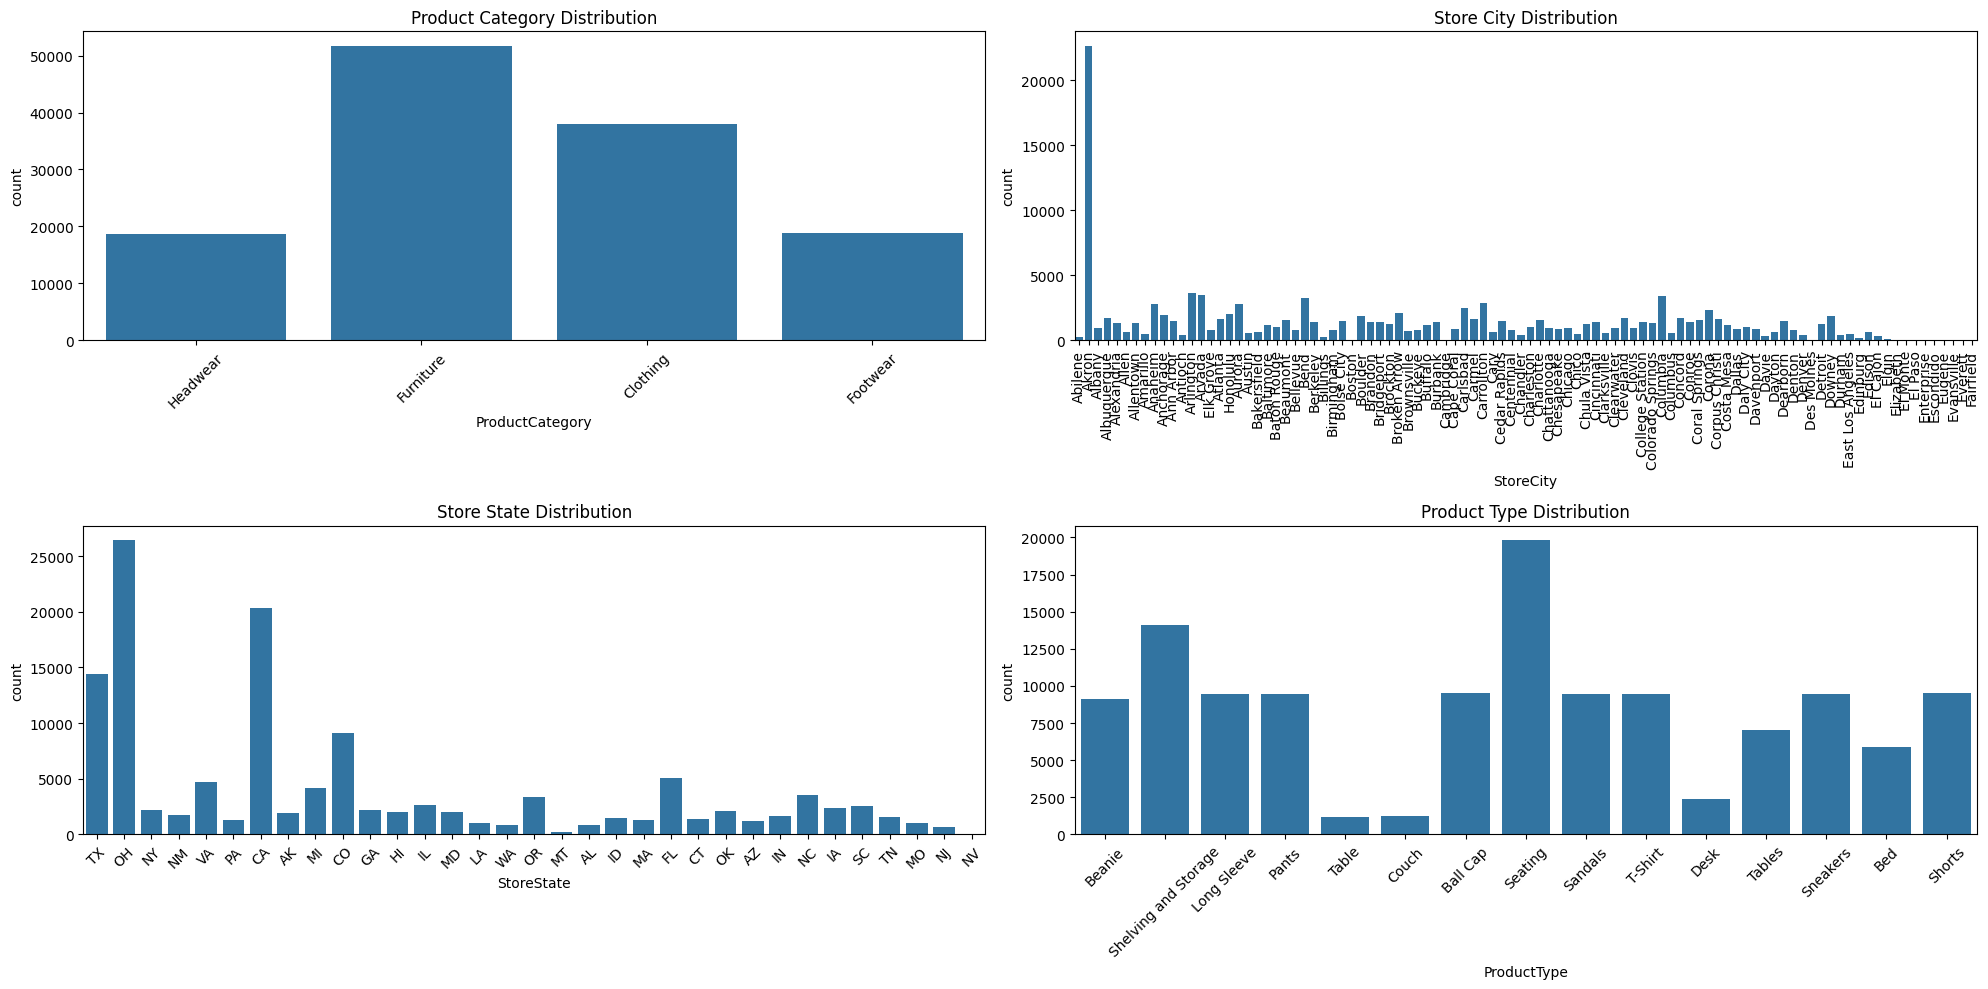

In [42]:
#Create countplots for the categorical variables
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='ProductCategory', data=df_clean)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.subplot(2, 2, 2)
sns.countplot(x='StoreCity', data=df_clean)
plt.title('Store City Distribution')
plt.xticks(rotation=90)
plt.subplot(2, 2, 3)
sns.countplot(x='StoreState', data=df_clean)
plt.title('Store State Distribution')
plt.xticks(rotation=45)
plt.subplot(2, 2, 4)
sns.countplot(x='ProductType', data=df_clean)
plt.title('Product Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


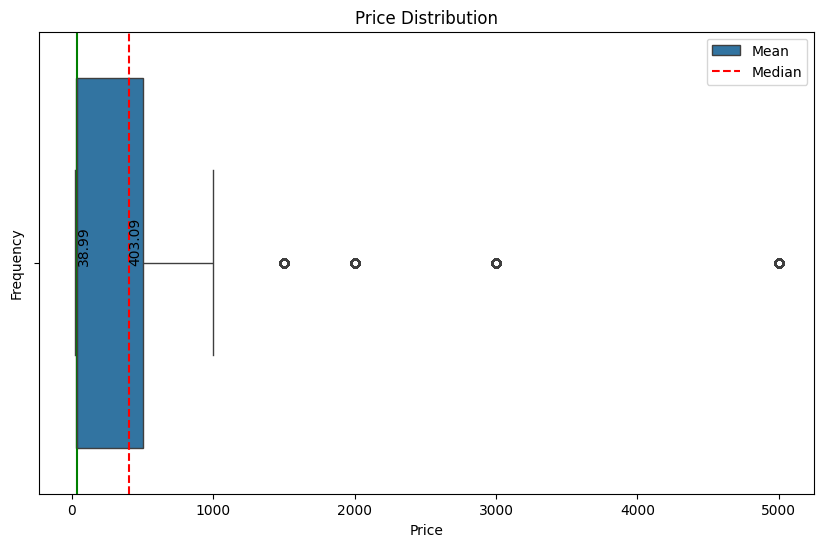

In [70]:
#Create a box and whisker plot for the Price_x column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_x', data=df_clean)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
#include the mean price
plt.axvline(df_clean['Price_x'].mean(), color='r', linestyle='--')
#include median price
plt.axvline(df_clean['Price_x'].median(), color='g', linestyle='-')
#Add legend
plt.legend({'Mean':df_clean['Price_x'].mean(),'Median':df_clean['Price_x'].median()})
#label the mean and median values
plt.text(df_clean['Price_x'].mean(), 0, round(df_clean['Price_x'].mean(), 2), rotation=90)
plt.text(df_clean['Price_x'].median(), 0, round(df_clean['Price_x'].median(), 2), rotation=90) # type: ignore
plt.show()

### Multivariate Analysis


In [53]:
#Order the date category in ascending order and convert it to datetime
df_clean['PurchaseDate'] = pd.to_datetime(df_clean['PurchaseDate'])
df_clean = df_clean.sort_values(by='PurchaseDate')


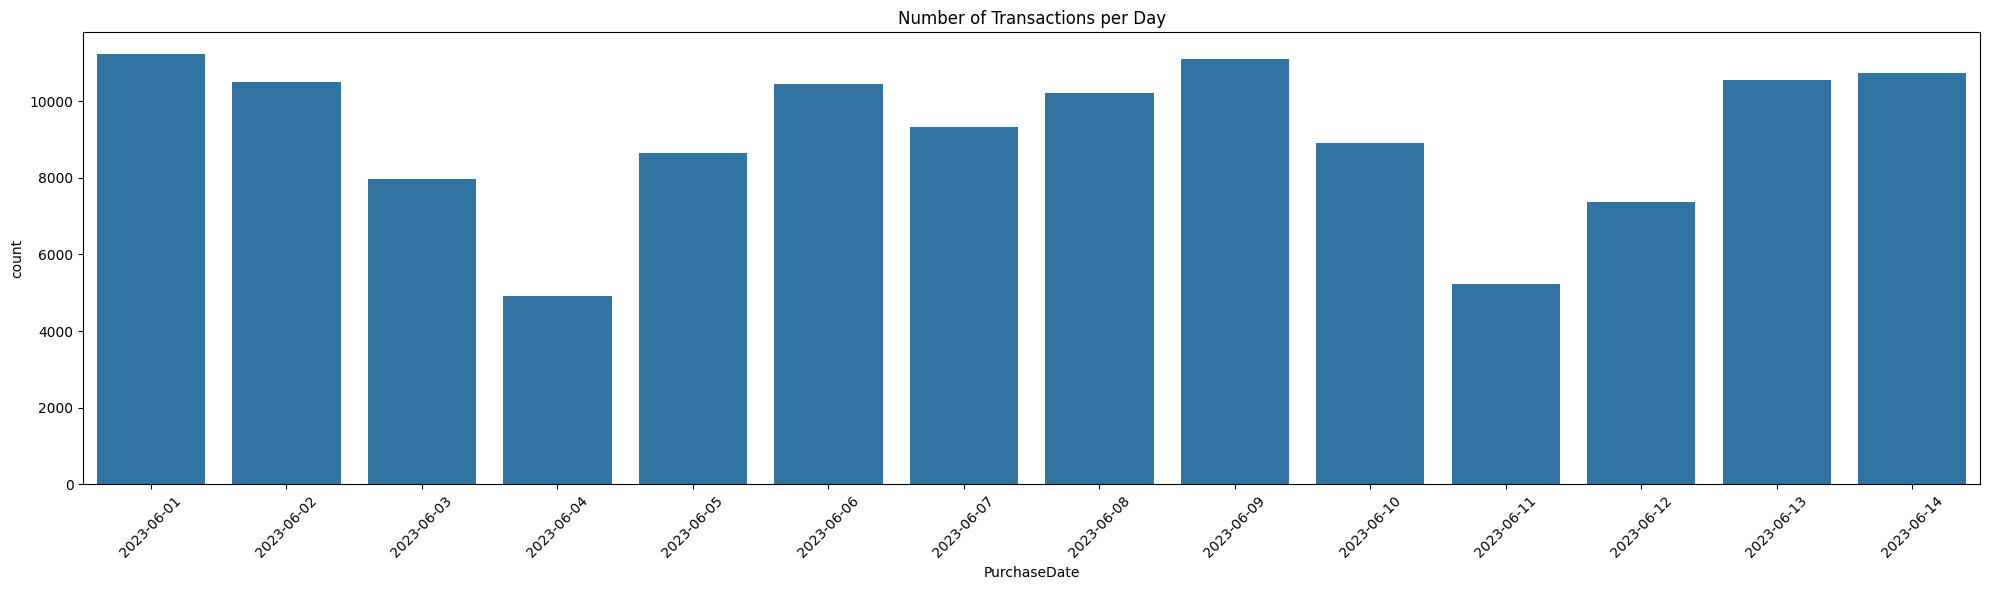

In [62]:
#Compare the number of transactions per day
plt.figure(figsize=(20, 6))
sns.countplot(x='PurchaseDate', data=df_clean)
plt.title('Number of Transactions per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Revenue Per Day

In [ ]:
#Calculate the total revenue per day
# Ensure the PurchaseDate column is in datetime format
df_clean['PurchaseDate'] = pd.to_datetime(df_clean['PurchaseDate'])

# Group by PurchaseDate and sum the Price_x column
total_spent_per_date = df_clean.groupby('PurchaseDate')['Price_x'].sum().reset_index()

# Rename the columns for clarity
total_spent_per_date.columns = ['PurchaseDate', 'TotalSpent']

# Display the result
print(total_spent_per_date)
 


   PurchaseDate  TotalSpent
0    2023-06-01  4582257.60
1    2023-06-02  4078411.84
2    2023-06-03  3235851.26
3    2023-06-04  1975073.89
4    2023-06-05  3438874.61
5    2023-06-06  4287441.38
6    2023-06-07  3875490.68
7    2023-06-08  4111269.75
8    2023-06-09  4339838.88
9    2023-06-10  3705877.83
10   2023-06-11  2049572.76
11   2023-06-12  2991726.30
12   2023-06-13  4291864.52
13   2023-06-14  4311001.66


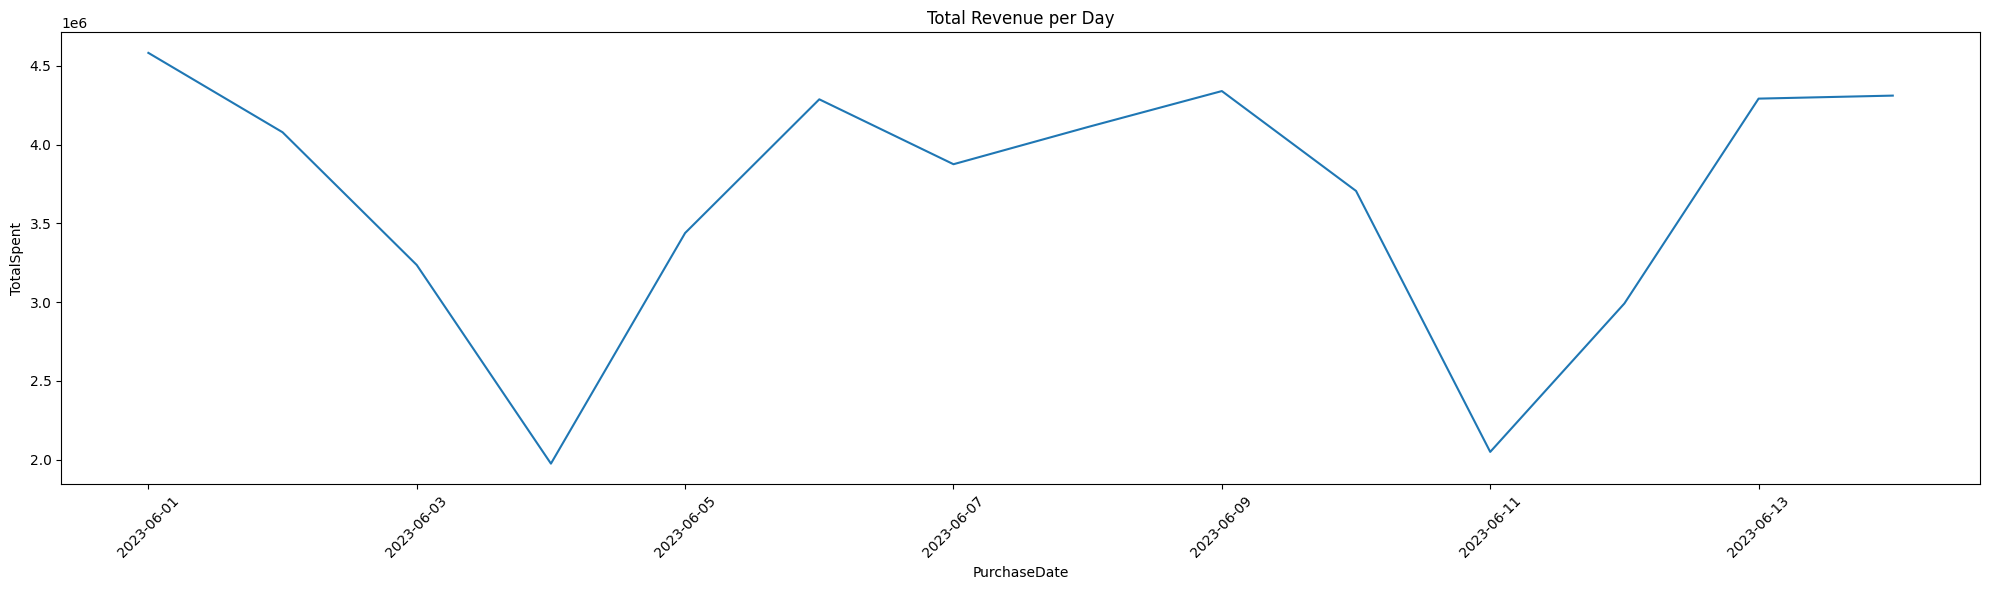

In [67]:
#Plot the total revenue per day
plt.figure(figsize=(20, 6))
sns.lineplot(x='PurchaseDate', y='TotalSpent', data=total_spent_per_date)
plt.title('Total Revenue per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* The total revenue drops precipitously on Sundays
* Weekdays are more popular

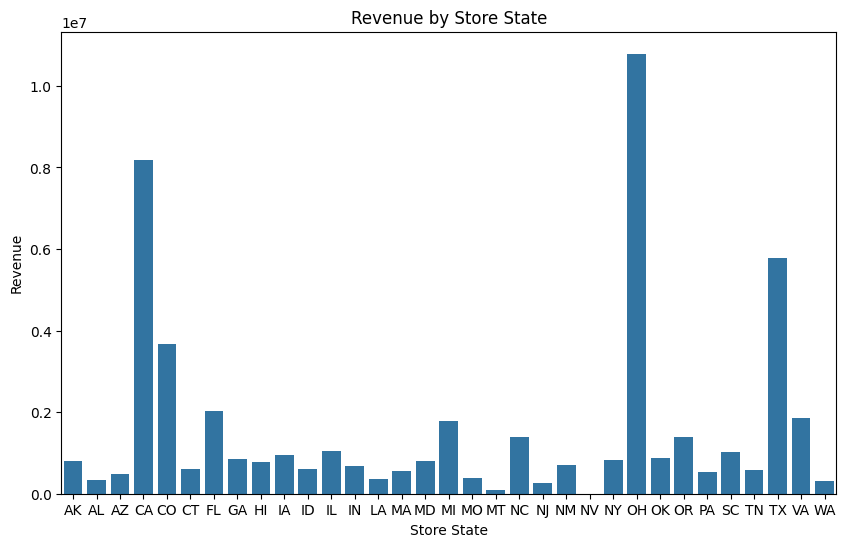

In [69]:
#Compare revenue by store state
revenue_by_state = df_clean.groupby('StoreState')['Price_x'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreState', y='Price_x', data=revenue_by_state)
plt.title('Revenue by Store State')
plt.xlabel('Store State')
plt.ylabel('Revenue')
plt.show()


* Ohio, California, and Texas lead all states in revenue over the generated time period

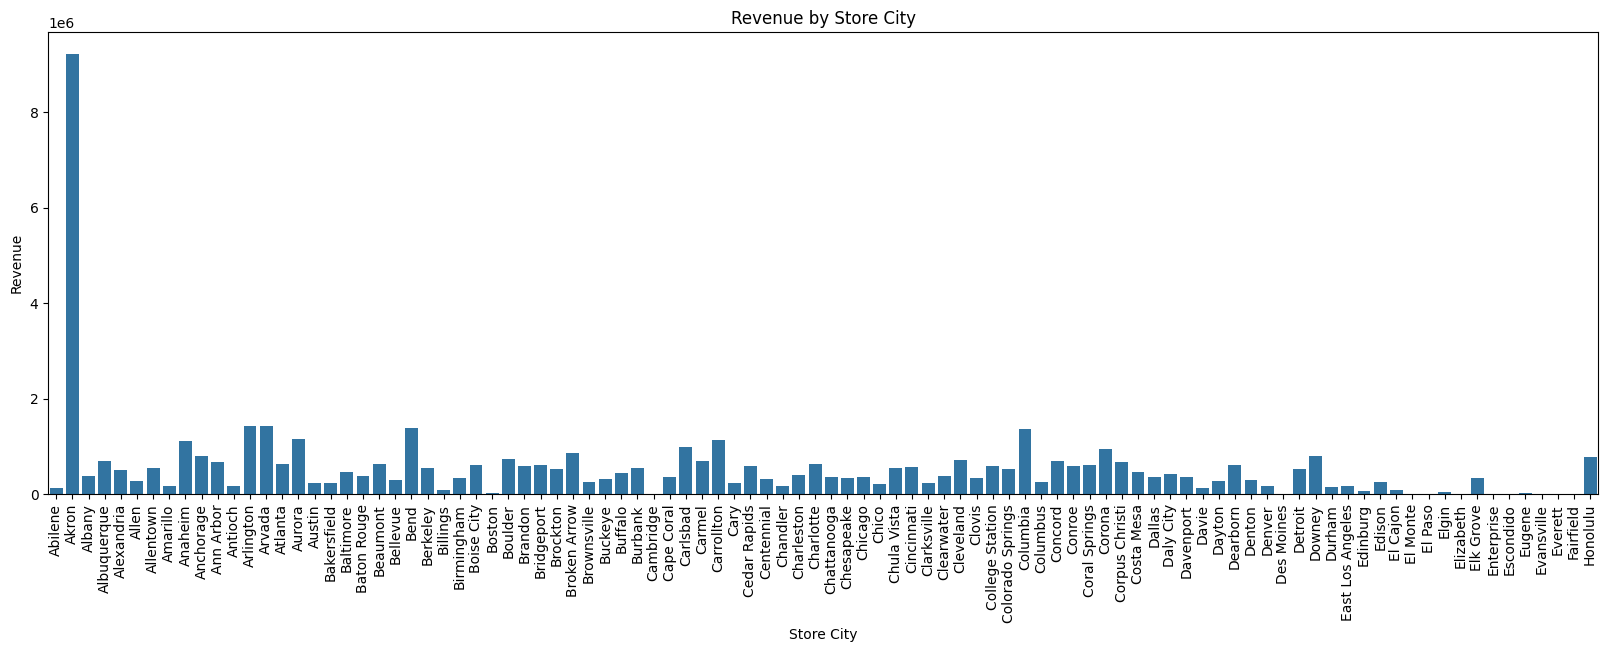

In [58]:
#Compare revenue by cities in Ohio, Texas and California
revenue_by_city = df_clean.groupby('StoreCity')['Price_x'].sum().reset_index()
plt.figure(figsize=(20, 6))
sns.barplot(x='StoreCity', y='Price_x', data=revenue_by_city)
plt.title('Revenue by Store City')
plt.xlabel('Store City')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

* Akron outperforms all Ohio city stores
* The next closest is about 10% of Akron's total revenue

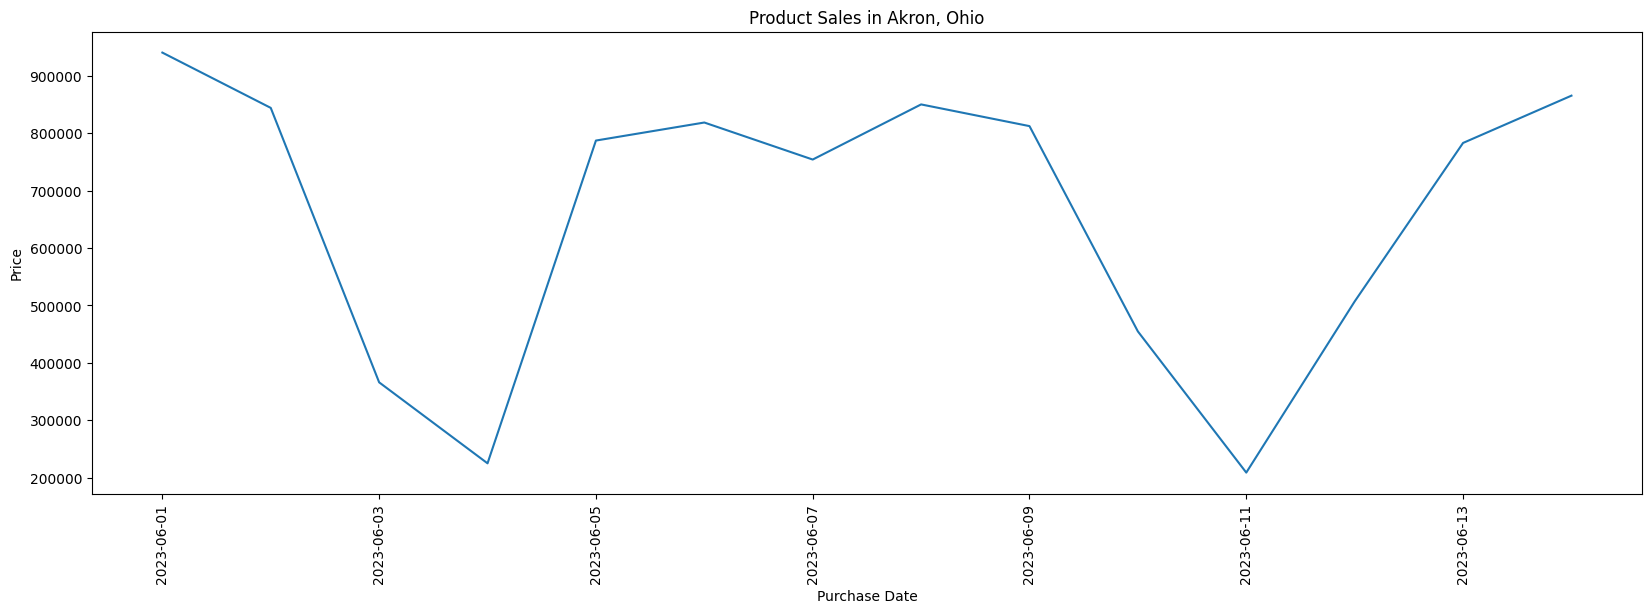

In [59]:
#Analyze sales in Akron, Ohio for the time series
akron_df = df_clean[df_clean['StoreCity'] == 'Akron']
akron_df = akron_df.groupby('PurchaseDate')['Price_x'].sum().reset_index()
plt.figure(figsize=(20, 6))
sns.lineplot(x='PurchaseDate', y='Price_x', data=akron_df)
plt.title('Product Sales in Akron, Ohio')
plt.xlabel('Purchase Date')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()


* Akron follows the same trend as the overall stores

### Insights
**Products:**
* Furniture is the best selling product category, more than double that of headware and footware, individually
* The best selliing product type is "Seating" and the worst are "tables" and "couches"

**Location:**
* State sales are heavily skewed: Ohio, California, and Texas outperform all other states
* Ohio outperforms all states and accounts for about 20% of sales
* Akron, Ohio is the highest sales performer in Ohio by nearly 10 times it's next competing city

**DateTime:**
* Sales drop on Sunday
* Sales are relatively consistent on weekdays

**Pricing:**
* Lower prices are favored over high-priced items
* High-priced items impact the mean pricepoint


### Next steps:
**Questions**
* Are any of your stores closed on Sundays?
* Can you account for the high number of sales in Ohio and, specifically, Akron?
* We should explore the furniture category further to determine why "Seating" and "Storage" dominate sales, while "couches" and "tables" fall very short


